# SEN4992 - HOW JOINT HYPERMOBILITY SYNDROME OF KNEE AFFECTS THE BALANCE AND POSTURAL SWAY?


* This study aims to is to apply binary classification technique with its specific algorithms to the given dataset. We plan to visualize the outcome of the algorithm with specific methods in order to make a prediction if the subject has the syndrome or not.


* Major findings of this analysis will be the prediction results for the specific algorithms. We'll run the algorithms on the data set and compare the accuracies. The best accuracy algorithm will be selected to implement.

### Importing the necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # For directory access

### Loading the dataset for the classification

In [8]:
dataset = pd.read_csv("C:/Users/DELL/Desktop/CAPSTONE PROJECT/CAPSTONE 2ND SEMESTER/dataset.csv")

### Summarizing the data and looking for general informations:

Starting from the top of the data:

In [9]:
dataset.head()

,Subject,Sex,Age,Height,Weight,BMI,FootLen,FootHeight,FallGroup,COParea_OS,...,mean_ml_OS,log_area_OS,log_long_axis_OS,log_short_axis_OS,angle_OS,mean_cross_ml_OS,mean_cross_ap_OS,zero-cross-V-ml_OS,zero-cross-V-ap_OS,LNG(log-path)_OS
0,1,m,33,157.5,54.20,21.849332,21.80,0.138413,control,0.827615,...,0.650120,-0.246412,-0.356354,-1.034788,-29.892487,25.666667,44.000000,310.333333,235.666667,3.671659
1,2,m,27,154.0,44.00,18.552876,22.45,0.145779,control,0.632228,...,0.675936,-0.471772,-0.263495,-1.353007,-30.329942,63.666667,30.000000,281.333333,248.666667,3.481645
2,3,f,36,161.7,63.40,24.247626,23.10,0.142857,control,3.224678,...,-2.828770,1.154438,0.280115,-0.270407,71.796417,29.000000,37.666667,181.000000,218.000000,4.153379
3,4,m,61,164.0,68.35,25.412701,24.70,0.150610,diseased,3.815930,...,-0.773823,1.307194,0.500267,-0.337802,-83.912986,35.000000,35.000000,149.666667,127.333333,4.242152
4,5,f,18,162.0,56.45,21.509678,22.90,0.100000,control,3.129373,...,-0.490584,1.136505,0.514321,-0.522546,-36.220692,36.333333,18.000000,215.333333,187.000000,3.904756


Also looking for the bottom part of the data

In [10]:
dataset.tail()

,Subject,Sex,Age,Height,Weight,BMI,FootLen,FootHeight,FallGroup,COParea_OS,...,mean_ml_OS,log_area_OS,log_long_axis_OS,log_short_axis_OS,angle_OS,mean_cross_ml_OS,mean_cross_ap_OS,zero-cross-V-ml_OS,zero-cross-V-ap_OS,LNG(log-path)_OS
92,93,f,72,154.0,49.30,20.787654,23.25,0.150974,control,4.327389,...,-0.198325,1.460053,0.554048,-0.238725,30.443045,49.000000,26.000000,186.666667,249.666667,4.366569
93,94,f,27,172.0,51.05,17.255949,24.55,0.142733,diseased,1.005665,...,-0.108133,-0.040072,-0.041221,-1.143580,-32.146915,46.666667,19.333333,255.666667,258.000000,3.500788
94,95,m,74,169.6,73.10,25.413570,24.65,0.145342,control,2.459584,...,0.493037,0.882306,0.007923,-0.270347,-75.398472,58.666667,47.000000,202.666667,236.333333,4.431653
95,96,f,27,164.5,65.40,24.168291,22.35,0.135866,control,1.842439,...,0.014720,0.501745,-0.070621,-0.572364,25.142992,40.666667,26.333333,173.333333,206.666667,3.877371
96,97,m,69,155.0,56.95,23.704475,22.05,0.142258,control,3.815044,...,-0.420210,1.337795,0.524690,-0.331625,14.813027,21.000000,23.666667,186.666667,161.000000,4.230320


### Checking the data information

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Subject             97 non-null     int64  
 1   Sex                 97 non-null     object 
 2   Age                 97 non-null     int64  
 3   Height              97 non-null     float64
 4   Weight              97 non-null     float64
 5   BMI                 97 non-null     float64
 6   FootLen             97 non-null     float64
 7   FootHeight          97 non-null     float64
 8   FallGroup           97 non-null     object 
 9   COParea_OS          97 non-null     float64
 10  COPvelo_OS          97 non-null     float64
 11  COPmfreq_OS         97 non-null     float64
 12  mean_ap_OS          97 non-null     float64
 13  mean_ml_OS          97 non-null     float64
 14  log_area_OS         97 non-null     float64
 15  log_long_axis_OS    97 non-null     float64
 16  log_short_

* As can be seen from the info line, the columns 'Sex' and 'FallGroup' has categorical datas. All the other columns has numerical values.


* According to the dataset there are no missing values. 


* Sex attribute is added for better analysis.

### Checking the number of unique Fallgroups


In [12]:
dataset.FallGroup.unique()

array(['control', 'diseased'], dtype=object)

As you can see from the results, the output is returned as array and it consists some unique types that needs to be mapped for further investigation.

### Changing the fallgroups to binary parts. Control and Diseased FallGroups

In [13]:
dataset['FallGroup'].loc[dataset['FallGroup'].isin(["control"])] = 1
dataset['FallGroup'].loc[dataset['FallGroup'].isin(["diseased"])] = 0
dataset = dataset.astype({'FallGroup': 'int'})

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Warning is due to the older technique usage

### Checking the total number of counts for each FallGroup


In [14]:
dataset["FallGroup"].value_counts()

1    74
0    23
Name: FallGroup, dtype: int64

This result basically means there are 74 control and 23 diseased people according to the FallGroup attribute.

### Grouping the Control/Diseased subjects according to the 'Sex' attribute

In [15]:
dataset.groupby(["Sex", "FallGroup"]).size()

Sex  FallGroup
f    0            10
     1            46
m    0            13
     1            28
dtype: int64

The result basically means:
* There are 28 control and 13 diseased male subjects 
whereas, 
* There are 46 control and 10 diseased female subjects
in the dataset.

### Checking the attributes of the dataset

In [16]:
dataset.describe()

,Subject,Age,Height,Weight,BMI,FootLen,FootHeight,FallGroup,COParea_OS,COPvelo_OS,...,mean_ml_OS,log_area_OS,log_long_axis_OS,log_short_axis_OS,angle_OS,mean_cross_ml_OS,mean_cross_ap_OS,zero-cross-V-ml_OS,zero-cross-V-ap_OS,LNG(log-path)_OS
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,46.989691,162.485567,62.793814,23.894605,22.998969,0.141211,0.762887,2.715162,0.993182,...,0.095010,0.753289,0.145924,-0.537364,-4.980957,38.618557,37.948454,203.189003,205.701031,4.018797
std,28.145456,22.831126,9.834844,8.205506,3.375802,1.424616,0.006877,0.427522,2.030984,0.391774,...,0.808442,0.618234,0.326764,0.346666,44.983826,12.937795,15.376023,37.093441,34.551173,0.345366
min,1.000000,18.000000,140.000000,44.000000,17.255949,20.350000,0.100000,0.000000,0.632228,0.513094,...,-2.828770,-0.471772,-0.472079,-1.353007,-83.912986,15.333333,11.000000,145.000000,127.333333,3.420712
25%,25.000000,25.000000,155.000000,56.700000,21.645303,21.800000,0.137615,1.000000,1.427637,0.721116,...,-0.370456,0.281163,-0.087692,-0.721593,-36.220692,29.666667,26.333333,174.666667,181.333333,3.766813
50%,49.000000,41.000000,161.800000,65.150000,23.858855,22.950000,0.141960,1.000000,2.077286,0.914234,...,0.103958,0.711274,0.132020,-0.563830,-8.898463,35.666667,36.000000,196.666667,204.000000,3.993100
75%,73.000000,68.000000,169.600000,70.000000,26.236725,24.000000,0.145404,1.000000,3.257818,1.143379,...,0.672450,1.177492,0.336489,-0.294485,25.362582,45.666667,45.666667,220.666667,230.333333,4.227206
max,97.000000,83.000000,189.800000,75.900000,31.992200,26.600000,0.153967,1.000000,13.389157,2.718658,...,1.831440,2.593426,1.205717,0.360796,87.158214,85.000000,89.666667,310.333333,321.666667,5.093946


### The heat map for correlation:

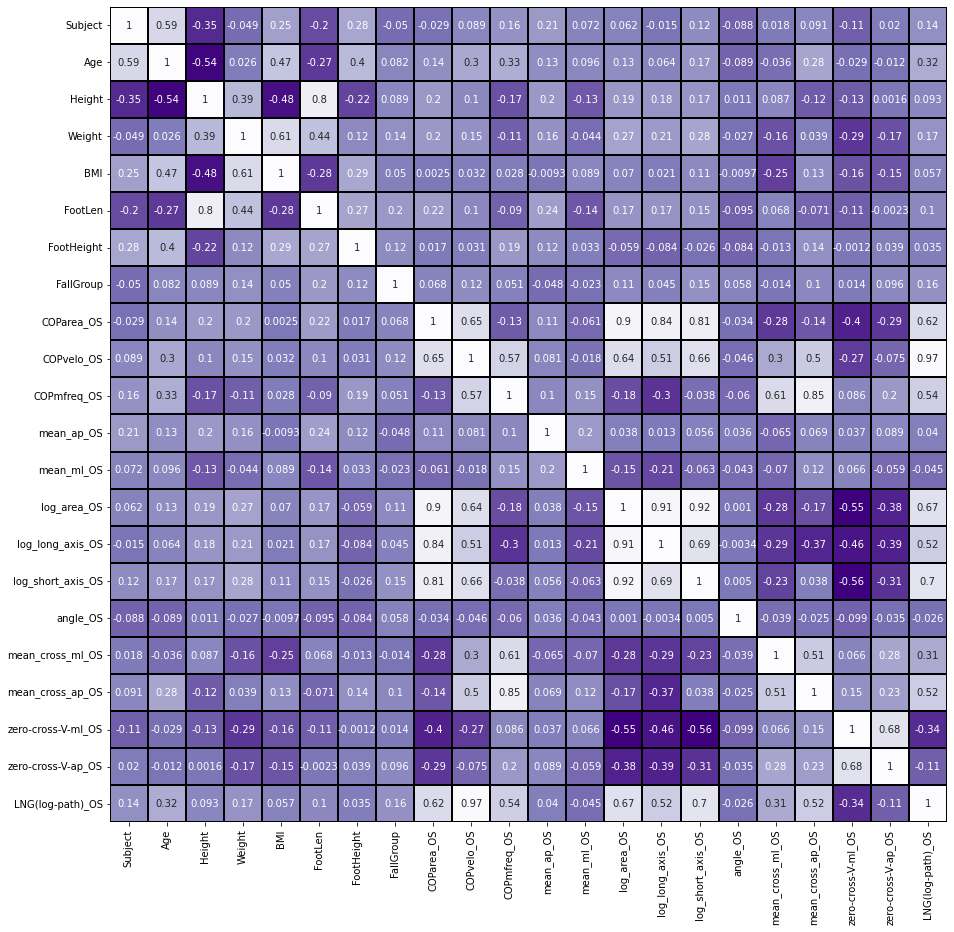

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True, fmt='.2g', cmap="Purples_r",
cbar=False, linewidths=0.4, linecolor='black');


### The total number of the diseased and control fallgroup subjects are printed for visualization

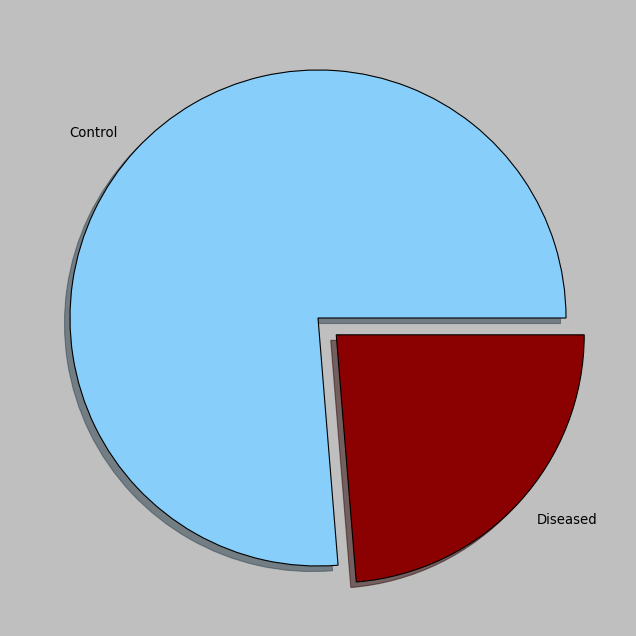

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(x=dataset["FallGroup"].value_counts(),
colors=["lightskyblue","darkred"],
labels=["Control","Diseased"],
shadow = True,
explode = (0, 0.1)
)
plt.show()


### Gender distribution among patients in the dataset:

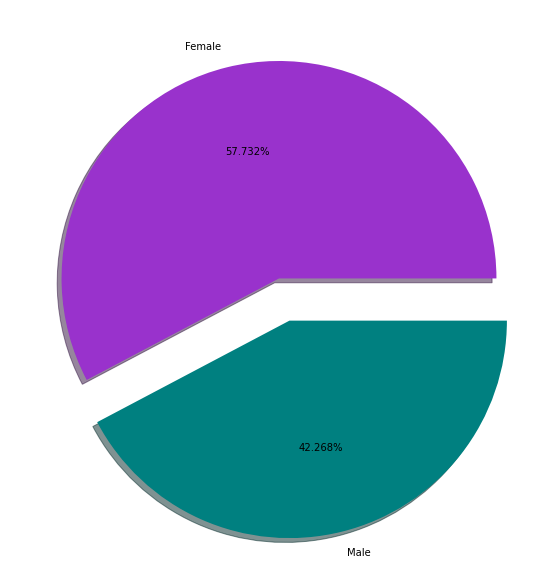

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(x=dataset["Sex"].value_counts(),
colors=["darkorchid","teal"],
labels=["Female","Male"],
shadow = True,
autopct="%1.3f%%",
explode = (0, 0.2)
)
plt.show()

## Visualization of the Data


### Univariate plots

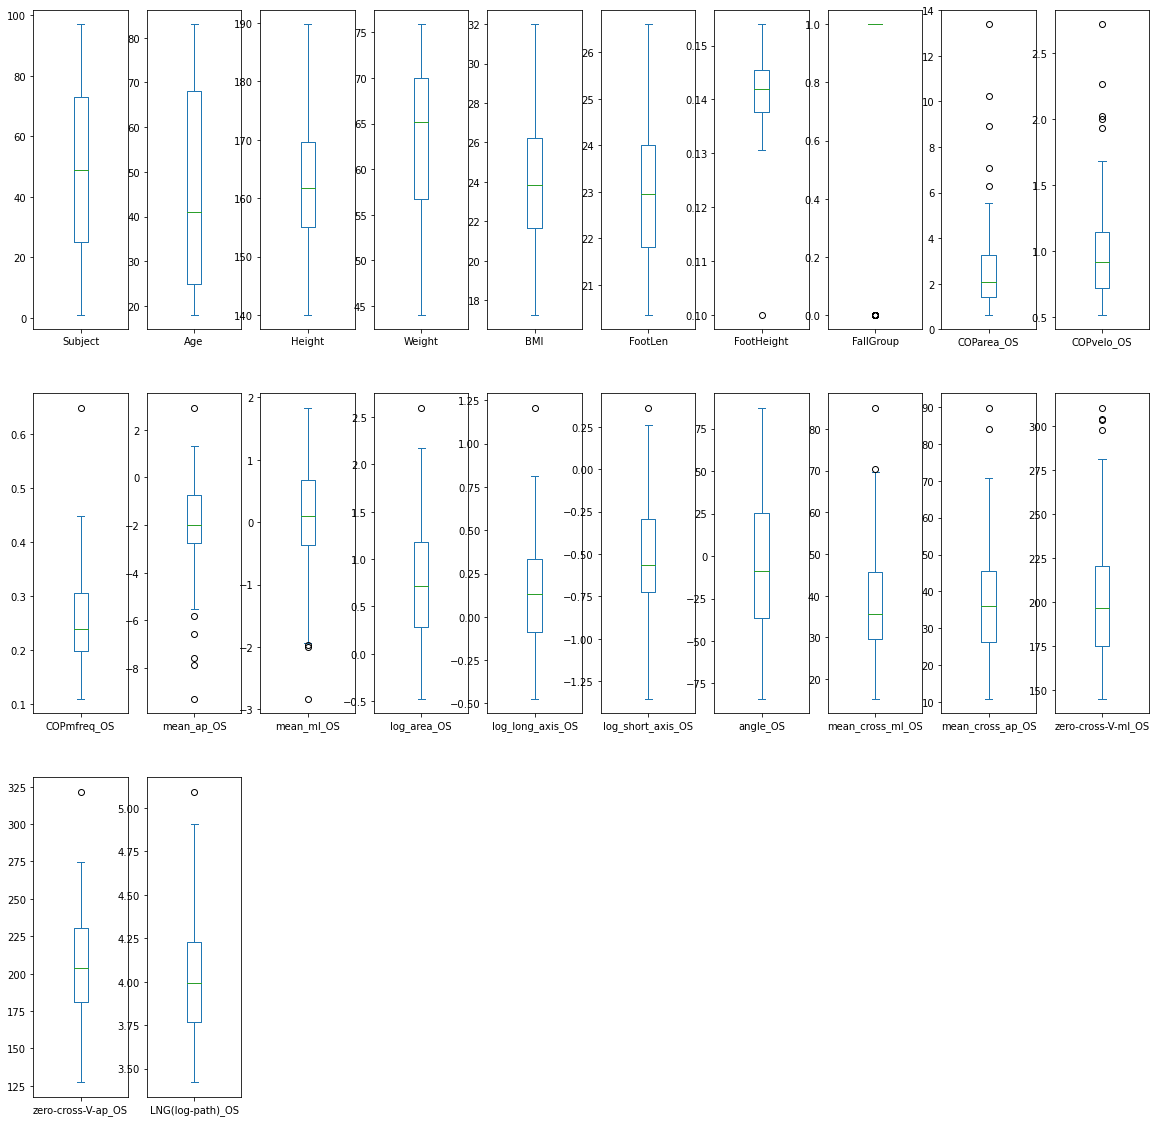

In [22]:
dataset.plot(kind="box", subplots = True, layout=(3,10),
figsize=(20,20))
plt.show()

* It can be understood from the boxplots that there are some outliers in this dataset. However the dataset is from a medical field and some feature may have more importance than another feature especially for postural sway parameters so outliers are important for at least this kind of analysis. 


* So we decided not to do anything about removing outliers or inlining them. In addition to that, most of the outliers are control fallgroup subjects, with this small of a dataset so it won't be making any difference if it's normalized or not.

### Histograms

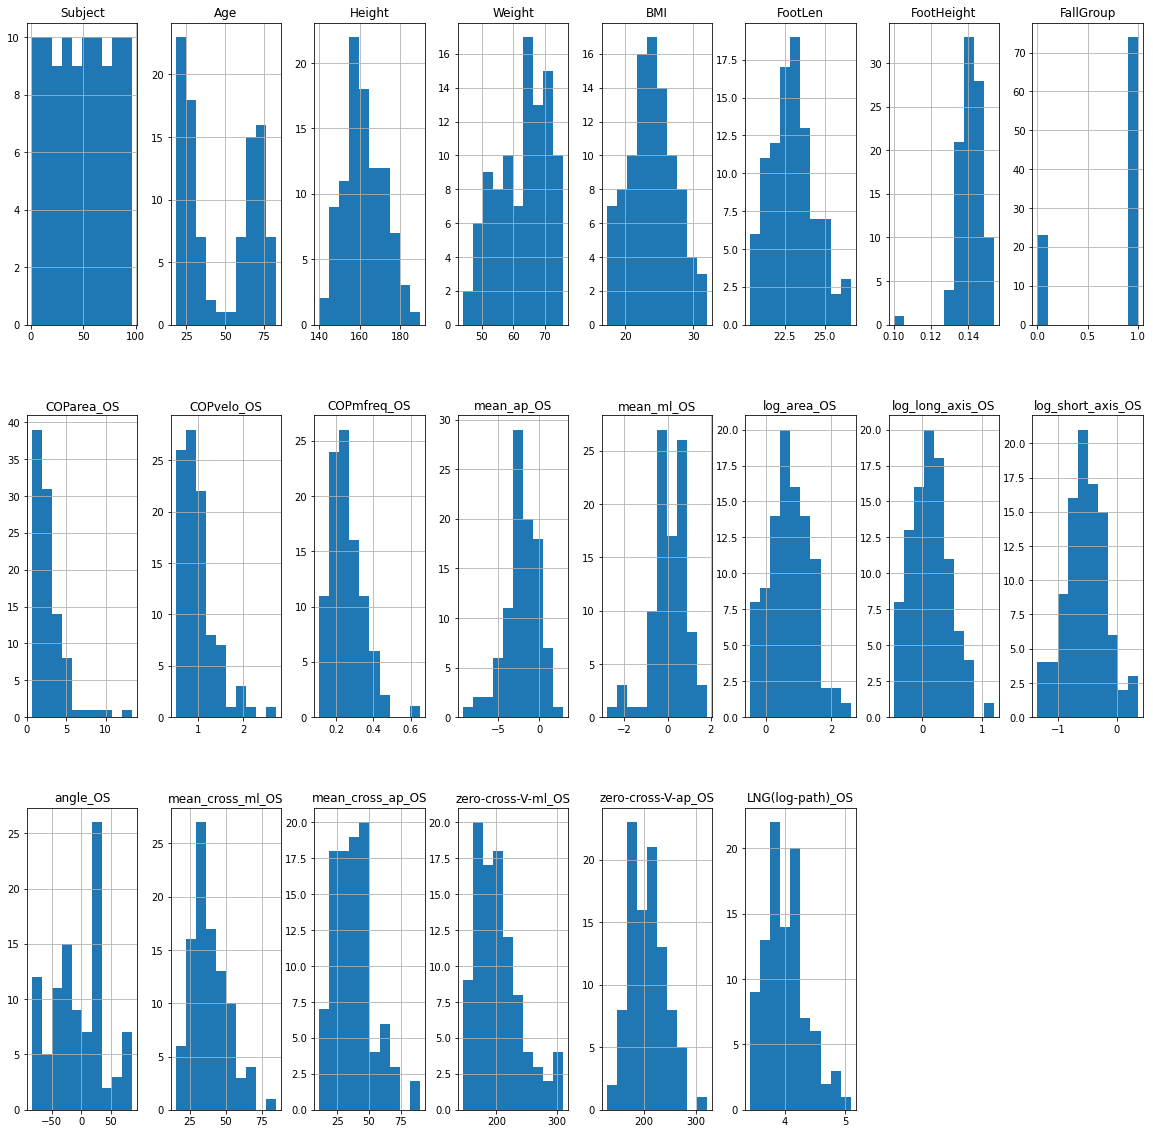

In [23]:
dataset.hist(layout=(3,8), figsize=(20,20))
plt.show()

It can be easily seen that few variables are kind of normally distributed even though removing outliers process is not done in this analysis.

### Histograms grouped by the 'Sex' attribute

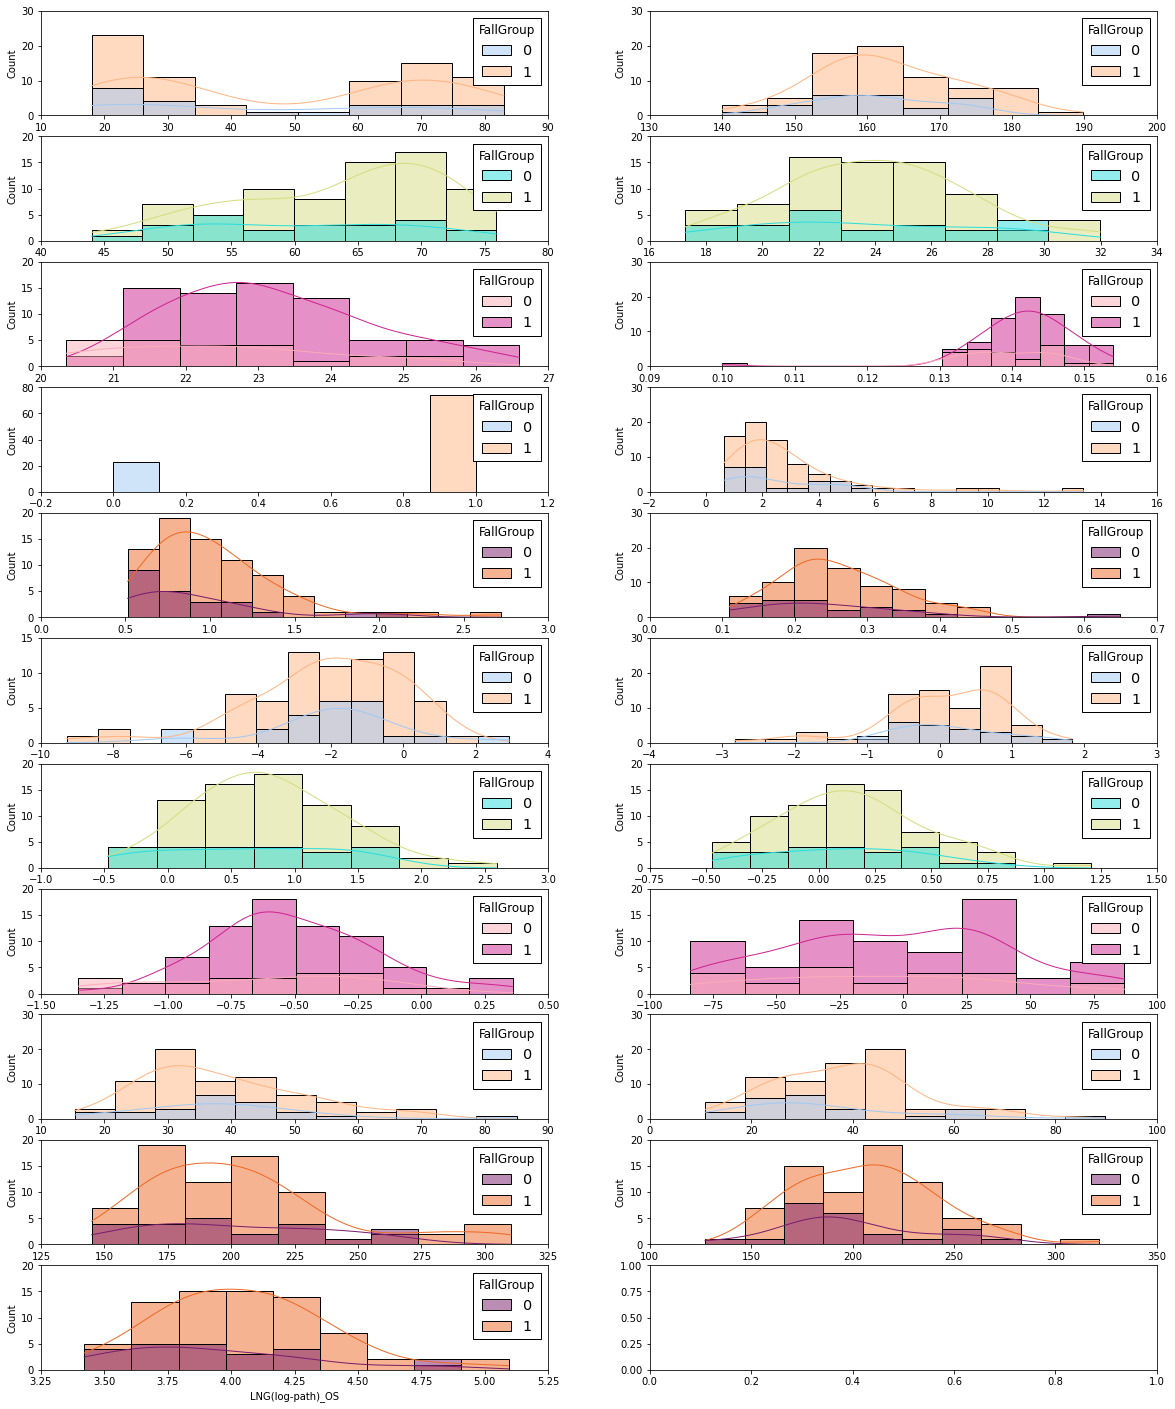

In [24]:
fig, ax =plt.subplots(11,2, figsize=(20,25))
plt.style.use("classic")

sns.histplot(x = dataset["Age"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=14)

sns.histplot(x = dataset["Height"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("Height",fontsize=14)

sns.histplot(x = dataset["Weight"], hue = dataset["FallGroup"],
palette="rainbow", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("Weight",fontsize=14)

sns.histplot(x = dataset["BMI"], hue = dataset["FallGroup"],
palette="rainbow", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("BMI",fontsize=14)

sns.histplot(x = dataset["FootLen"], hue = dataset["FallGroup"],
palette="RdPu", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("FootLen",fontsize=14)

sns.histplot(x = dataset["FootHeight"], hue = dataset["FallGroup"],
palette="RdPu", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("FootHeight",fontsize=14)

sns.histplot(x = dataset["FallGroup"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("FallGroup",fontsize=14)

sns.histplot(x = dataset["COParea_OS"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("COParea_OS",fontsize=14)

sns.histplot(x = dataset["COPvelo_OS"], hue = dataset["FallGroup"],
palette="inferno", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("COPvelo_OS",fontsize=14)

sns.histplot(x = dataset["COPmfreq_OS"], hue = dataset["FallGroup"],
palette="inferno", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("COPmfreq_OS",fontsize=14);

sns.histplot(x = dataset["mean_ap_OS"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[5,0]);
ax[0,0].set_xlabel("mean_ap_OS",fontsize=14)

sns.histplot(x = dataset["mean_ml_OS"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[5,1]);
ax[0,1].set_xlabel("mean_ml_OS",fontsize=14)

sns.histplot(x = dataset["log_area_OS"], hue = dataset["FallGroup"],
palette="rainbow", kde=True, ax=ax[6,0]);
ax[1,0].set_xlabel("log_area_OS",fontsize=14)

sns.histplot(x = dataset["log_long_axis_OS"], hue = dataset["FallGroup"],
palette="rainbow", kde=True, ax=ax[6,1]);
ax[1,1].set_xlabel("log_long_axis_OS",fontsize=14)

sns.histplot(x = dataset["log_short_axis_OS"], hue = dataset["FallGroup"],
palette="RdPu", kde=True, ax=ax[7,0]);
ax[2,0].set_xlabel("log_short_axis_OS",fontsize=14)

sns.histplot(x = dataset["angle_OS"], hue = dataset["FallGroup"],
palette="RdPu", kde=True, ax=ax[7,1]);
ax[2,1].set_xlabel("angle_OS",fontsize=14)

sns.histplot(x = dataset["mean_cross_ml_OS"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[8,0]);
ax[3,0].set_xlabel("mean_cross_ml_OS",fontsize=14)

sns.histplot(x = dataset["mean_cross_ap_OS"], hue = dataset["FallGroup"],
palette="pastel", kde=True, ax=ax[8,1]);
ax[3,1].set_xlabel("mean_cross_ap_OS",fontsize=14)

sns.histplot(x = dataset["zero-cross-V-ml_OS"], hue = dataset["FallGroup"],
palette="inferno", kde=True, ax=ax[9,0]);
ax[4,0].set_xlabel("zero-cross-V-ml_OS",fontsize=14)

sns.histplot(x = dataset["zero-cross-V-ap_OS"], hue = dataset["FallGroup"],
palette="inferno", kde=True, ax=ax[9,1]);
ax[4,1].set_xlabel("zero-cross-V-ap_OS",fontsize=14);

sns.histplot(x = dataset["LNG(log-path)_OS"], hue = dataset["FallGroup"],
palette="inferno", kde=True, ax=ax[10,0]);
ax[4,1].set_xlabel("LNG(log-path)_OS",fontsize=14);

### Comparisons between attributes: 'FallGroup' with age groupped by 'Sex'

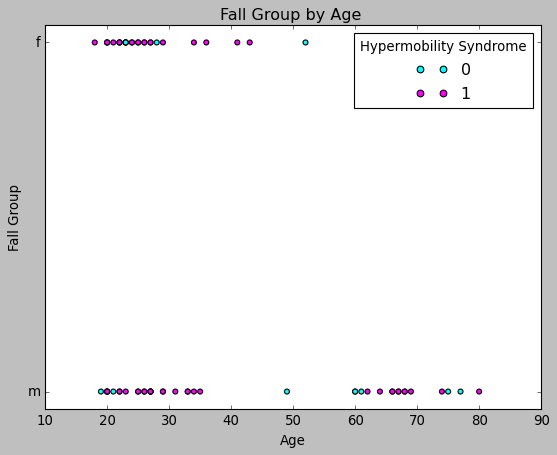

In [25]:
x = dataset['Age']
y = dataset["FallGroup"]
scatter = plt.scatter(x, dataset["Sex"], c=y, cmap='cool')
plt.title('Fall Group by Age ')
plt.xlabel('Age')
plt.ylabel('Fall Group')
plt.legend(*scatter.legend_elements(), title='Hypermobility Syndrome')
plt.show()


As can be seen from the graph, this syndrome can be seen nearly at all ages. 

### Numerical values of 'Sex' attribute
In order to analyze more and accurately, we need to put numerical data in the 'Sex' column which are already binary type.

In [18]:
dataset['Sex'].loc[dataset['Sex']=='m']=1
dataset['Sex'].loc[dataset['Sex']=='f']=0
dataset = dataset.astype({'Sex': 'int'})

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Warning is due to the older technique usage. It does not effect the analysis.

After mapping, let's check the head of the data again.

In [19]:
dataset.head()

,Subject,Sex,Age,Height,Weight,BMI,FootLen,FootHeight,FallGroup,COParea_OS,...,mean_ml_OS,log_area_OS,log_long_axis_OS,log_short_axis_OS,angle_OS,mean_cross_ml_OS,mean_cross_ap_OS,zero-cross-V-ml_OS,zero-cross-V-ap_OS,LNG(log-path)_OS
0,1,1,33,157.5,54.20,21.849332,21.80,0.138413,1,0.827615,...,0.650120,-0.246412,-0.356354,-1.034788,-29.892487,25.666667,44.000000,310.333333,235.666667,3.671659
1,2,1,27,154.0,44.00,18.552876,22.45,0.145779,1,0.632228,...,0.675936,-0.471772,-0.263495,-1.353007,-30.329942,63.666667,30.000000,281.333333,248.666667,3.481645
2,3,0,36,161.7,63.40,24.247626,23.10,0.142857,1,3.224678,...,-2.828770,1.154438,0.280115,-0.270407,71.796417,29.000000,37.666667,181.000000,218.000000,4.153379
3,4,1,61,164.0,68.35,25.412701,24.70,0.150610,0,3.815930,...,-0.773823,1.307194,0.500267,-0.337802,-83.912986,35.000000,35.000000,149.666667,127.333333,4.242152
4,5,0,18,162.0,56.45,21.509678,22.90,0.100000,1,3.129373,...,-0.490584,1.136505,0.514321,-0.522546,-36.220692,36.333333,18.000000,215.333333,187.000000,3.904756


### Declaring the Input and Output values

In [20]:
Xval = dataset.drop(labels="FallGroup", axis=1)

In [21]:
yval = dataset["FallGroup"]

### Splitting the examined dataset for the training and testing parts
Using the information provided, we are attempting to forecast if the patient has Hyperjoint Mobility Syndrome or not. As a result, the Y label will be the FallGroup, and the rest of the data will be the X, or input data.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xval,yval,test_size=0.3, random_state=0)

### Working on different models by GridSearchCV

To decide which classification model is best for this dataset, we need to test the models using GridSearchCV.

We plan to implement: 
* Logistic Regression
* Decision Tree Classifier
* Random Forest
* GaussianNB
* SVM

algorithms to the dataset.

### Creating a dictionary for the parameters of the Models. This will create an ease for the model implementation

In [23]:
# Importing necessary the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
model_param = {'DecisionTreeClassifier':{'model':
DecisionTreeClassifier(random_state=0), 'param': {'criterion':
['gini','entropy']}},
'Randomforest': {'model':
RandomForestClassifier(random_state=0), 'param': {'n_estimators':
[1,5,10,15,20,25,30,40,50,60,80,100]}},
'LogisticRegression':{'model':
LogisticRegression(solver='liblinear',multi_class='auto',
random_state=0),'param': {'C': [1,5,10,15,20]}},
'GaussianNB':{'model': GaussianNB(), 'param': {}},
'SVM':{'model': SVC(gamma='auto', random_state=0),
'param': {'C': [0.001,0.1,1],'kernel':['rbf', 'linear']}}
}

### Evaluating the models with GridSearchCV
By the help of the GridSearchCV, we can reach the best scores of each algorithm.

In [25]:
from sklearn.model_selection import GridSearchCV

score_list = []

for naming, parameters in model_param.items():
    classification = GridSearchCV(parameters['model'],
    parameters['param'], cv=5,return_train_score=None)
    classification.fit(Xval,yval)
    score_list.append({
        'model': naming,
        'best_score': classification.best_score_,
        'best_params': classification.best_params_
})

### Results
Now score_list has all the best scores of each algorithm.

In [26]:
score_list

[{'model': 'DecisionTreeClassifier',
  'best_score': 0.5347368421052632,
  'best_params': {'criterion': 'entropy'}},
 {'model': 'Randomforest',
  'best_score': 0.7342105263157895,
  'best_params': {'n_estimators': 50}},
 {'model': 'LogisticRegression',
  'best_score': 0.7010526315789474,
  'best_params': {'C': 1}},
 {'model': 'GaussianNB', 'best_score': 0.6005263157894737, 'best_params': {}},
 {'model': 'SVM',
  'best_score': 0.7631578947368423,
  'best_params': {'C': 0.001, 'kernel': 'rbf'}}]

## Scores with Data Frame
### Scores are listed as data frames with increasing order of the best_score values:

In [27]:
scores_all_algorithms = pd.DataFrame(score_list)
scores_all_algorithms .sort_values(by=['best_score'], inplace = True,
ascending=False)

In [28]:
scores_all_algorithms

,model,best_score,best_params
4,SVM,0.763158,"{'C': 0.001, 'kernel': 'rbf'}"
1,Randomforest,0.734211,{'n_estimators': 50}
2,LogisticRegression,0.701053,{'C': 1}
3,GaussianNB,0.600526,{}
0,DecisionTreeClassifier,0.534737,{'criterion': 'entropy'}


## Support Vector Machine (SVM) Algorithm has the greatest results among all the algorithms. Its parameters are specifically valued.
### We are going to continue with implementing the SVM Algorithm

In [29]:
algorithm = SVC(C=0.1, kernel='linear')
algorithm.fit(X_train, y_train)
# Predictoins:
prediction = algorithm.predict(X_test)

### Confusion matrix for Comparison

In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction)
conf_matrix

array([[ 0,  6],
       [ 4, 20]], dtype=int64)

### Confusion Matrix for better visualization of the output:

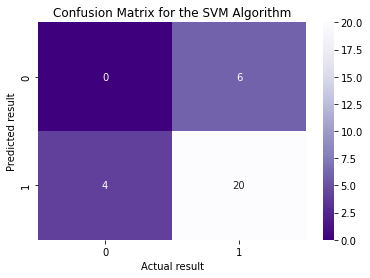

In [31]:
sns.heatmap(conf_matrix, annot=True, cmap="Purples_r" ,fmt='g')
plt.title('Confusion Matrix for the SVM Algorithm')
plt.xlabel('Actual result')
plt.ylabel('Predicted result')
plt.show()

It can be seen that there are:
* 20 True-positive,  
* 4 False-positive, 
* 6 False-negative,
* 0 True-negative predictions.

This concludes that the model somehow guessing right because of the given dataset.

### Accuracy of the Classification
Classification occuracy is calculated by the formula correct predictions / total predictions * 100.

In [32]:
classification_accuracy = (0 + 20) / (0 + 4 + 6 + 20) * 100
print("Accuracy of the classification for this algorithm "+ str(round(classification_accuracy,2))+"%")

Accuracy of the classification for this algorithm 66.67%


### Error rate for this algorithm is:

In [33]:
rate_of_error = 100 - classification_accuracy
print("Error Rate:"+ str(round(rate_of_error, 2)) + "%")

Error Rate:33.33%


## SHAP Values
Being transparent and understandable can be increased by machine learning models and Shap values helps that procedure.
TreeSHAP and KernelSHAP methods will be used in terms of the random forest machine learning algorithm.

### Random forest algorithm for the SHAP values feature importance

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [48]:
!pip install shap

 ### Implementing SHAP Values

In [64]:
import shap  
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

It can be seen that:
* Base value is 0.7478
* The visual above shows us the values that varies the resulted algorithm value from higher or lower from the base value. Higher means it is pushing the prediction higher, lower means it is pushing it lower.
* It can be understood that FootHeight, mean_ml_OS, Weight pushes the prediction higher whereas COParea_OS pushes the prediction lower.

### Now let's check this graph for the whole dataset. 

In [65]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

## Feature Importance for the SHAP Values

### The concept of feature importance is obvious. It's crucial to have features with high absolute SHAP values. We simply averaged the values for the whole data.

The features are then sorted and plotted in order of decreasing relevance. The SHAP feature significance for the trained random forest model is depicted in the diagram below.

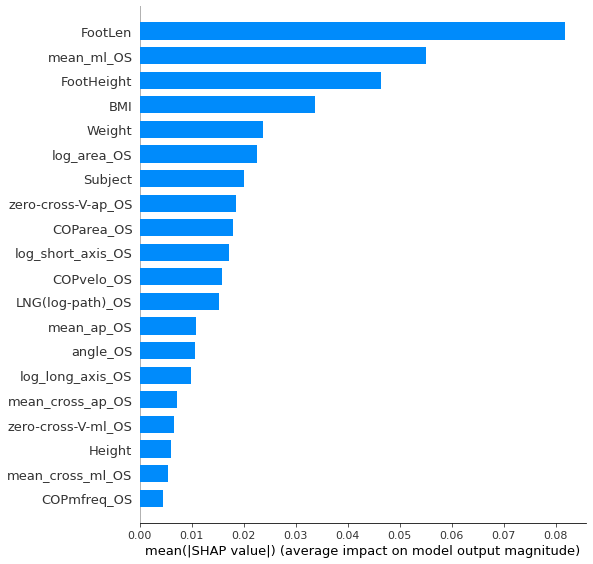

In [66]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### According to the plot, FootLen is the most important feature among other features.
It changed the value of the FallGroup by 0.08 

### Summary Plot
Feature importance and feature effects are combined on the summary plot below. It is ordered by the importance

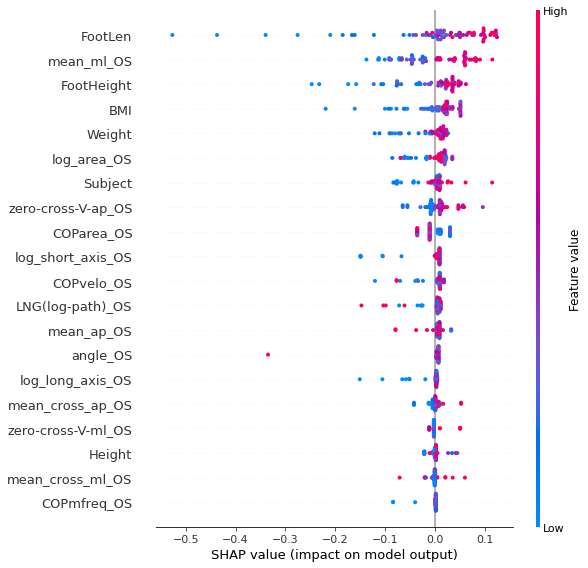

In [67]:
shap.summary_plot(shap_values, X_train)